In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Table of Contents
- [Load and Preprocess Data](#preprocess)

- [Data Summary and NaN Statistics](#summary)

- [Data Visualization](#visualization)

- [Util Functions [run this first]](#utils)

## Load and preprocess data
<a id='preprocess'></a>


In [35]:
metrics = ['NWFcls', 'NWFwrc', 'ORFwc', 'SAwrS', 'SAsrS', 'SAtoS', 'RMwidRS', 'RMwdaRS']

all_data = pd.read_csv('./data/ms_s1s2tier2impact.csv')
all_data_dna = all_data.dropna()
data_t0 = all_data_dna[all_data_dna['t']==0]
data_t1 = all_data_dna[all_data_dna['t']==1]

data_merged = data_t0.merge(data_t1, how = 'inner', on='StuID')
data_merged_w_delta = data_merged.copy()
for m in metrics:
    t_0_name = m + '_x'
    t_1_name = m + '_y'
    new_m = data_merged[t_1_name] - data_merged[t_0_name]
    data_merged_w_delta[m + '_delta'] = new_m

## Data summary
<a id='summary'></a>


In [138]:
describe_data(all_data)

,count,mean,std,min,25%,50%,75%,max,nan_counts,nan_rate
Unnamed: 0,6248.0,3124.500000,1803.786573,1.000000,1562.750000,3124.500000,4686.250000,6248.000000,0,0.000000
StuID,6248.0,4498.782330,2936.411401,1.000000,2076.000000,3966.000000,6863.000000,9649.000000,0,0.000000
Gender,6244.0,0.516976,0.499752,0.000000,0.000000,1.000000,1.000000,1.000000,4,0.000640
Tier,6248.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0,0.000000
SchlID,6248.0,24.186300,13.325175,1.000000,12.000000,24.000000,37.000000,45.000000,0,0.000000
TeachID,6248.0,124.921255,88.060689,3.000000,41.000000,121.000000,173.000000,373.000000,0,0.000000
LEP,5936.0,0.197439,0.398100,0.000000,0.000000,0.000000,0.000000,1.000000,312,0.049936
SpEd,5936.0,0.070081,0.255305,0.000000,0.000000,0.000000,0.000000,1.000000,312,0.049936
Tx,6248.0,0.473111,0.499316,0.000000,0.000000,0.000000,1.000000,1.000000,0,0.000000
Cohort,6248.0,1.484635,0.499804,1.000000,1.000000,1.000000,2.000000,2.000000,0,0.000000


## Visualization
<a id='visualization'></a>

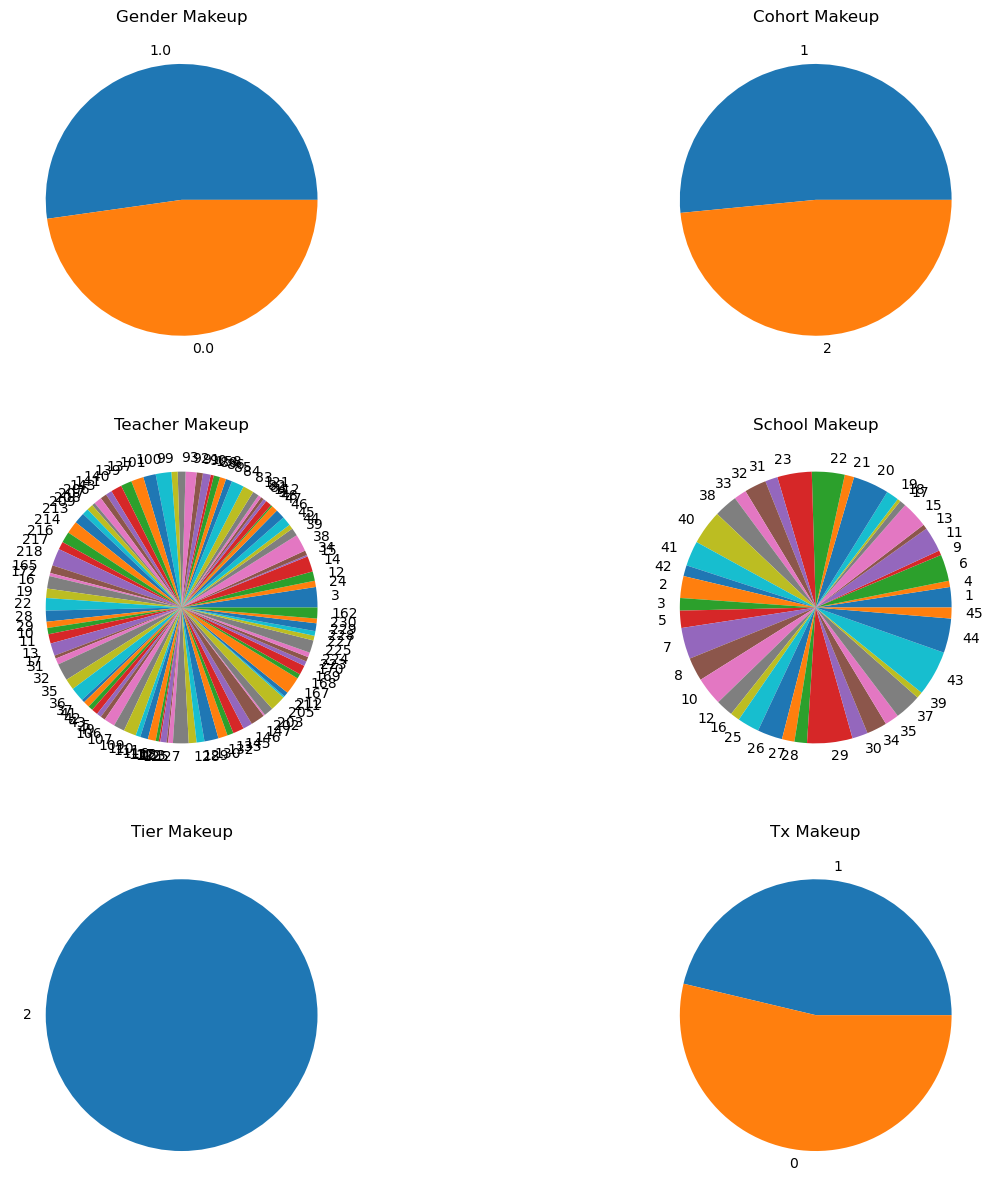

In [79]:
fig, ax = plt.subplots(3,2, figsize=(15, 15))
piechart(ax[0,0], data_merged_w_delta, 'Gender_x', 'Gender Makeup')
piechart(ax[0,1], all_data, 'Cohort', 'Cohort Makeup')
piechart(ax[1,0], data_merged_w_delta, 'TeachID_x', 'Teacher Makeup')
piechart(ax[1,1], data_merged_w_delta, 'SchlID_x', 'School Makeup')
piechart(ax[2,0], data_merged_w_delta, 'Tier_x', 'Tier Makeup')
piechart(ax[2,1], data_merged_w_delta, 'Tx_x', 'Tx Makeup')

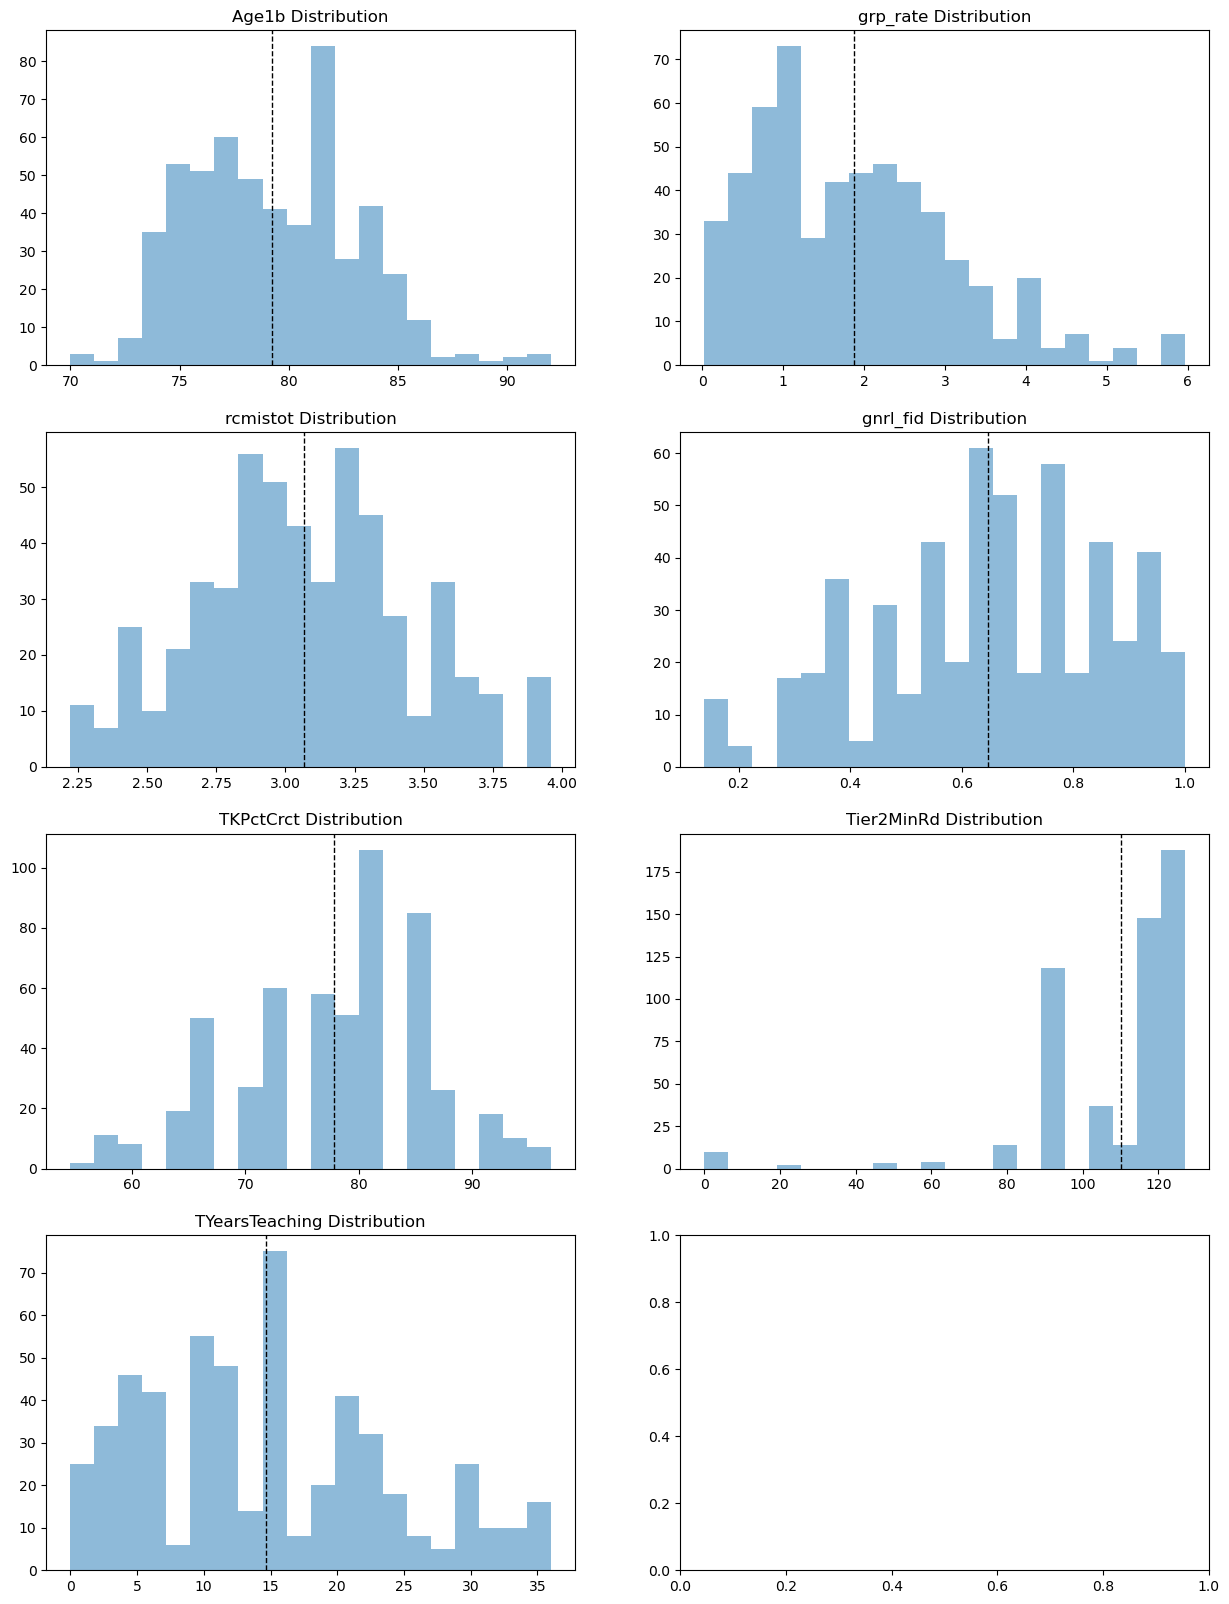

In [104]:
fig, ax = plt.subplots(4,2, figsize=(15, 20))
historgram(ax[0,0], data_merged_w_delta, 'Age1b_x', 'Age1b Distribution')
historgram(ax[0,1], data_merged_w_delta, 'grp_rate_x', 'grp_rate Distribution')
historgram(ax[1,0], data_merged_w_delta, 'rcmistot_x', 'rcmistot Distribution')
historgram(ax[1,1], data_merged_w_delta, 'gnrl_fid_x', 'gnrl_fid Distribution')
historgram(ax[2,0], data_merged_w_delta, 'TKPctCrct_x', 'TKPctCrct Distribution')
historgram(ax[2,1], data_merged_w_delta, 'Tier2MinRd_x', 'Tier2MinRd Distribution')
historgram(ax[3,0], data_merged_w_delta, 'TYearsTeaching_x', 'TYearsTeaching Distribution')

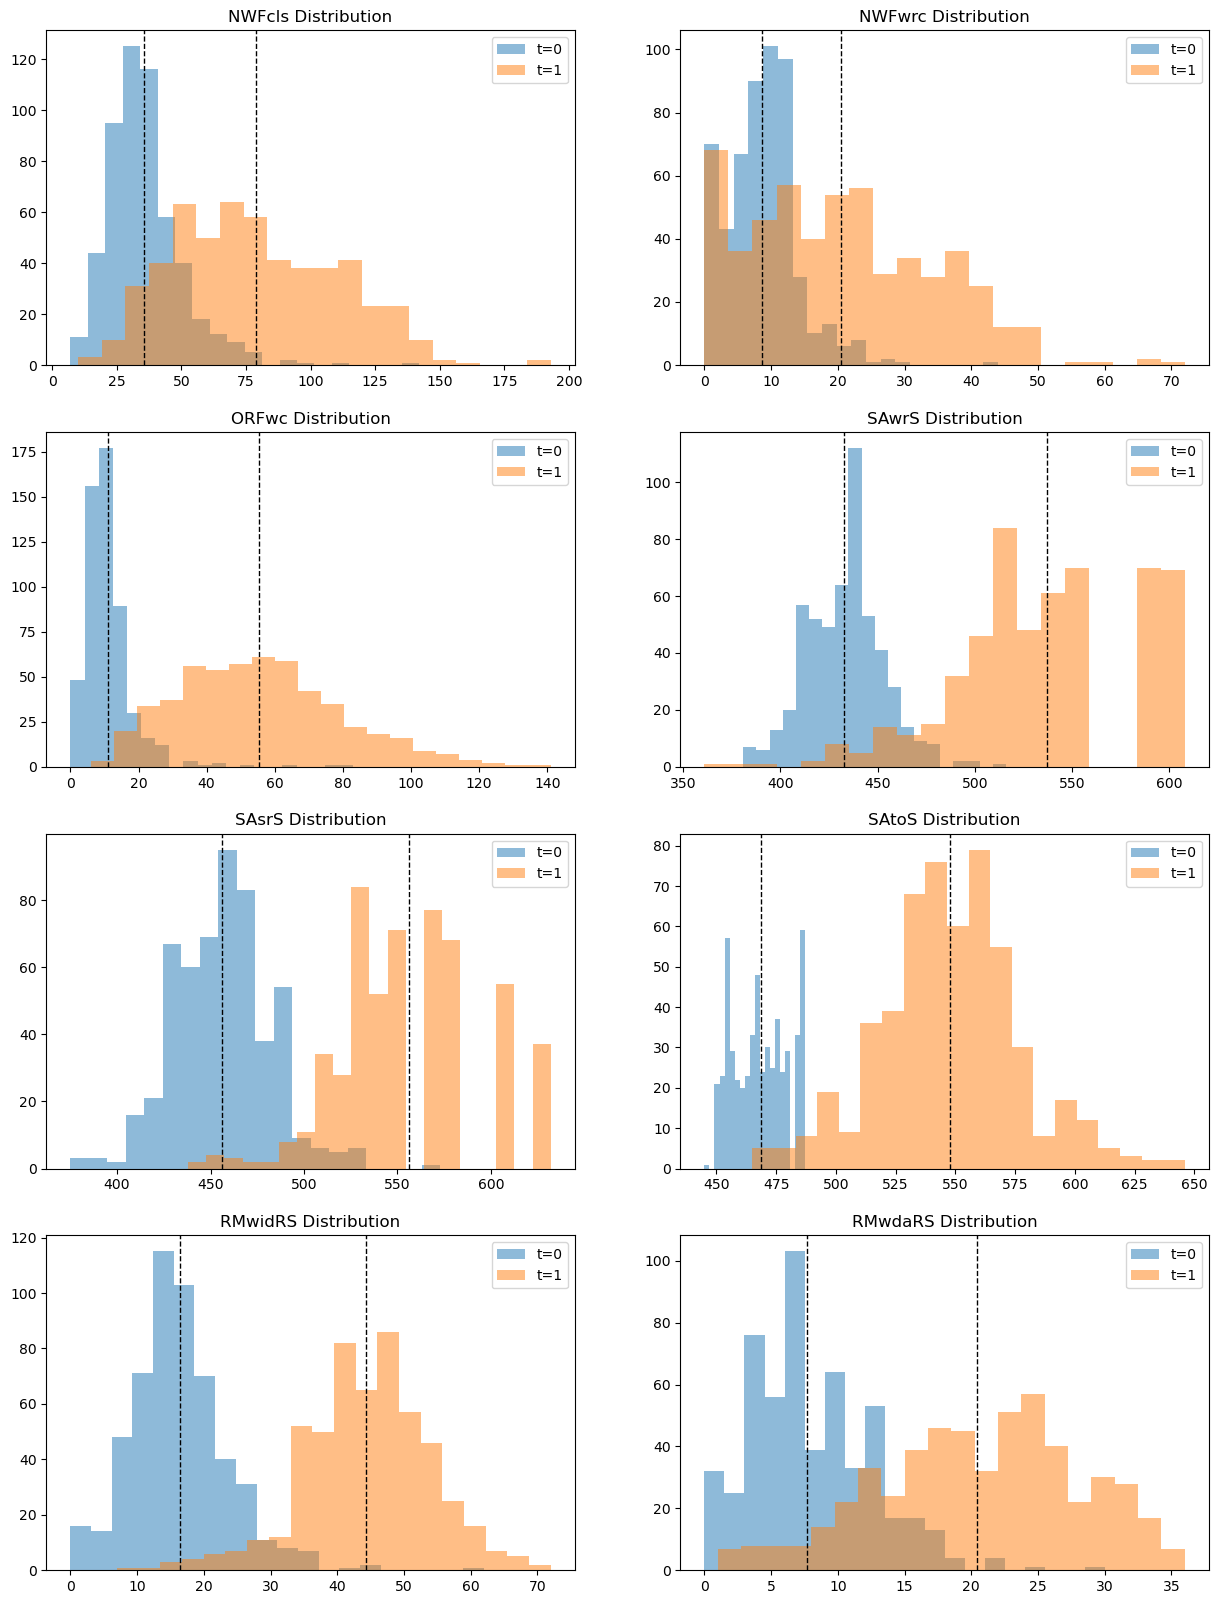

In [114]:
metrics = ['NWFcls', 'NWFwrc', 'ORFwc', 'SAwrS', 'SAsrS', 'SAtoS', 'RMwidRS', 'RMwdaRS']

fig, ax = plt.subplots(4, 2, figsize=(15, 20))
for i, m in enumerate(metrics):
    idx_x = i//2
    idx_y = i % 2
    historgram(ax[idx_x,idx_y], data_merged_w_delta, m +'_x', '{} Distribution'.format(m), labels='t=0')
    historgram(ax[idx_x,idx_y], data_merged_w_delta, m +'_y', labels='t=1')


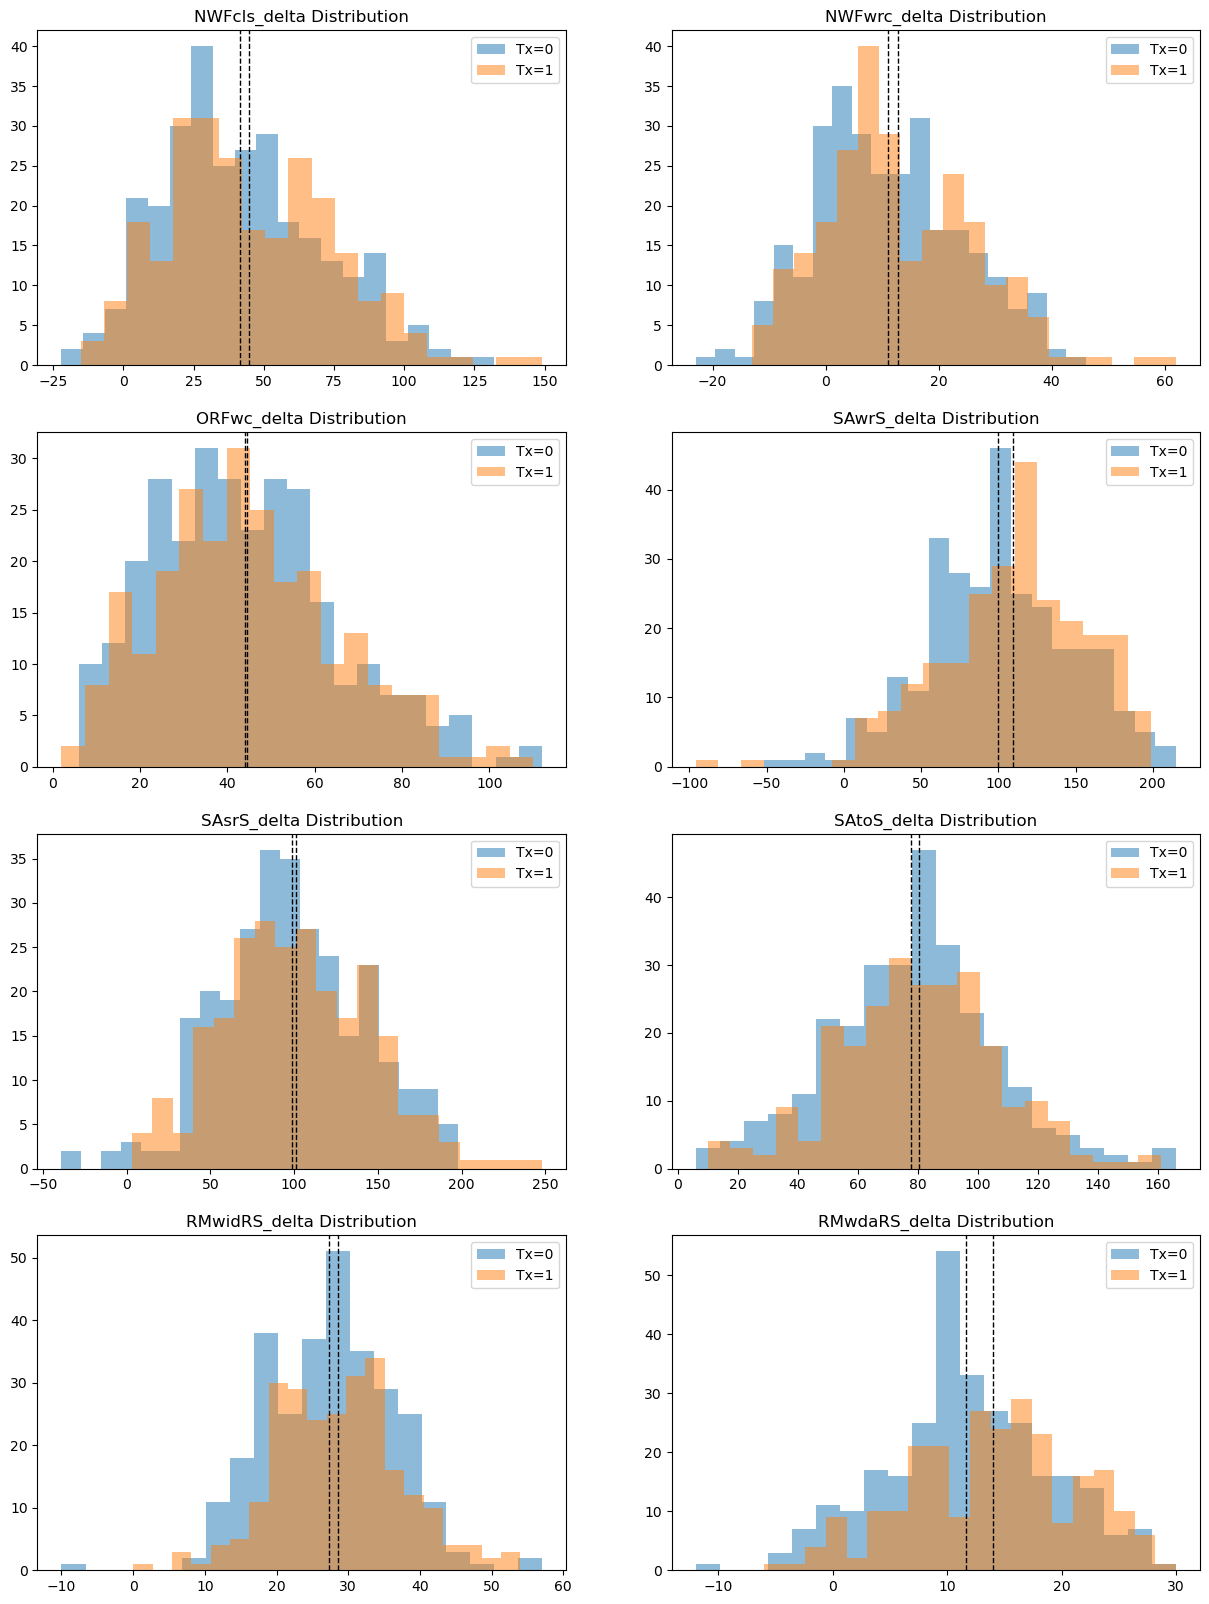

In [117]:
metrics = ['NWFcls', 'NWFwrc', 'ORFwc', 'SAwrS', 'SAsrS', 'SAtoS', 'RMwidRS', 'RMwdaRS']

fig, ax = plt.subplots(4, 2, figsize=(15, 20))
for i, m in enumerate(metrics):
    idx_x = i//2
    idx_y = i % 2
    historgram(ax[idx_x,idx_y], data_merged_w_delta[data_merged_w_delta['Tx_x']==0], m +'_delta', \
               '{}_delta Distribution'.format(m), labels='Tx=0')
    historgram(ax[idx_x,idx_y], data_merged_w_delta[data_merged_w_delta['Tx_x']==1], m +'_delta', \
               '{}_delta Distribution'.format(m), labels='Tx=1')

## Utils
<a id='utils'></a>


In [137]:
def describe_data(df):
    
    nan_stats = describe_nan(df)
    general_stats = df.describe().transpose()
    
    return pd.merge(general_stats, nan_stats, left_index=True, right_index=True)

def describe_nan(df):
    nan_stats= pd.DataFrame([(df[df[i].isna()].shape[0],df[df[i].isna()].shape[0]/df.shape[0]) for i in df.columns], columns=['nan_counts', 'nan_rate'])
    nan_stats.index = df.columns
    return nan_stats

def piechart(ax, data, col_name, title, labels=None):
    c = data[col_name].unique()
    counts = []
    for cc in c:
        counts.append((data[col_name] == cc).sum())
    
    if labels:
        ax.pie(counts, labels=labels)
        return 
    
    ax.pie(counts, labels=c)
    ax.set_title(title)
    return


def historgram(ax, data, col_name, title=None, labels=None, nbins=20, legend=None):
    _, _, hist = ax.hist(data[col_name],bins=nbins, alpha=0.5)
    ax.axvline(data[col_name].mean(), color='k', linestyle='dashed', linewidth=1)
    
    if title:
        ax.set_title(title)
    
    if labels:
        hist.set_label(labels)
        ax.legend()
    return